In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plp
import math


titanic_data = pd.read_csv('titanic3.csv')
titanic_data.head(11)

Matplotlib is building the font cache; this may take a moment.


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
5,1,1,"Anderson, Mr. Harry",male,48.0000,0,0,19952,26.5500,E12,S,3,NaN,"New York, NY"
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0000,1,0,13502,77.9583,D7,S,10,NaN,"Hudson, NY"
7,1,0,"Andrews, Mr. Thomas Jr",male,39.0000,0,0,112050,0.0000,A36,S,NaN,NaN,"Belfast, NI"
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0000,2,0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY"
9,1,0,"Artagaveytia, Mr. Ramon",male,71.0000,0,0,PC 17609,49.5042,NaN,C,NaN,22.0,"Montevideo, Uruguay"


In [2]:
print("# of passengers in original data:" +str(len(titanic_data.index)))

# of passengers in original data:1309


## Analyzing data

<Axes: xlabel='survived', ylabel='count'>

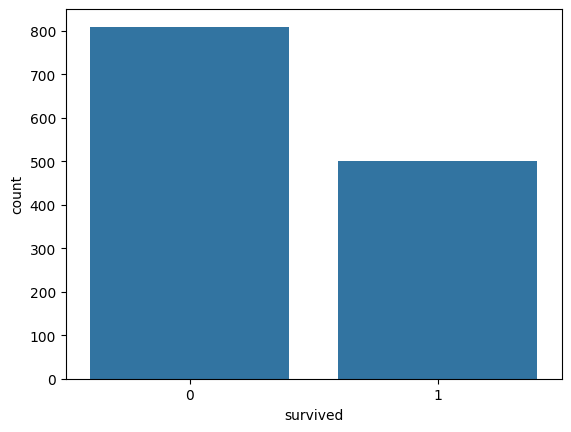

In [3]:
sns.countplot(x='survived', data=titanic_data)

<Axes: xlabel='survived', ylabel='count'>

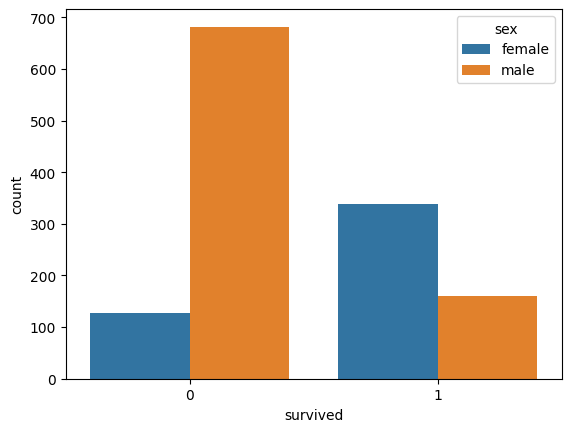

In [4]:
sns.countplot(x='survived', hue="sex", data=titanic_data)

<Axes: xlabel='survived', ylabel='count'>

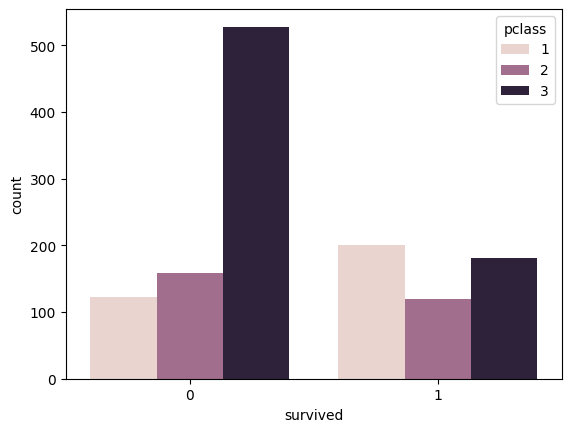

In [5]:
sns.countplot(x='survived', hue="pclass", data=titanic_data)

<Axes: ylabel='Frequency'>

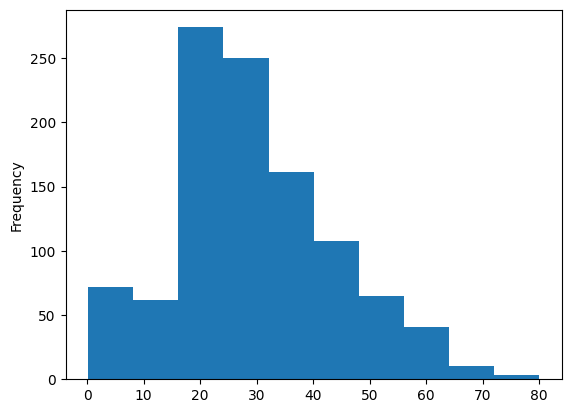

In [6]:
titanic_data["age"].plot.hist()

<Axes: ylabel='Frequency'>

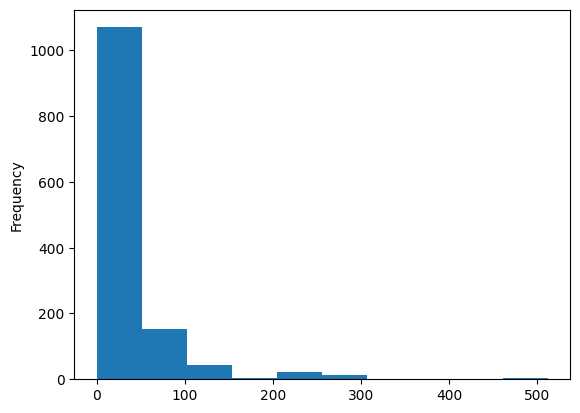

In [7]:
titanic_data['fare'].plot.hist()

<Axes: xlabel='survived', ylabel='count'>

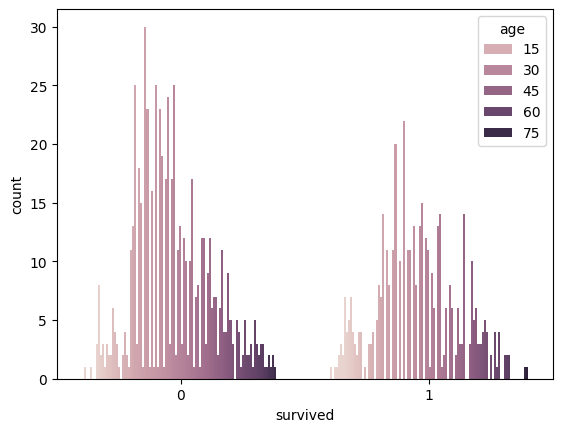

In [8]:
sns.countplot(x='survived', hue="age", data=titanic_data)

<Axes: ylabel='Frequency'>

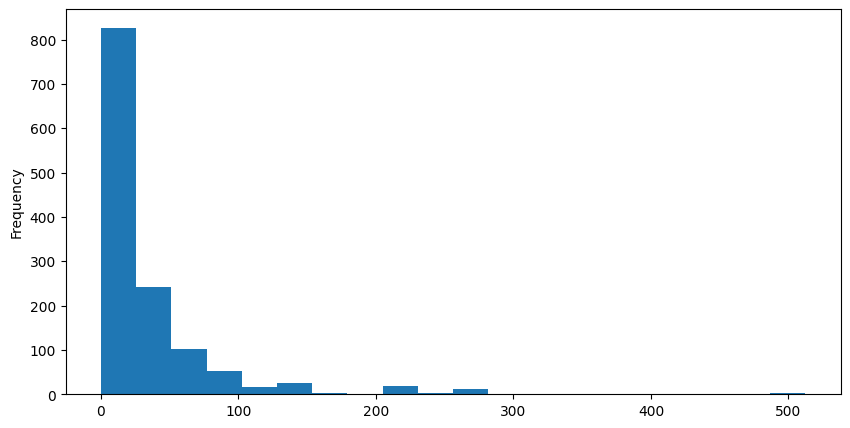

In [9]:
titanic_data['fare'].plot.hist(bins=20, figsize=(10, 5))

In [10]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


<Axes: xlabel='sibsp', ylabel='count'>

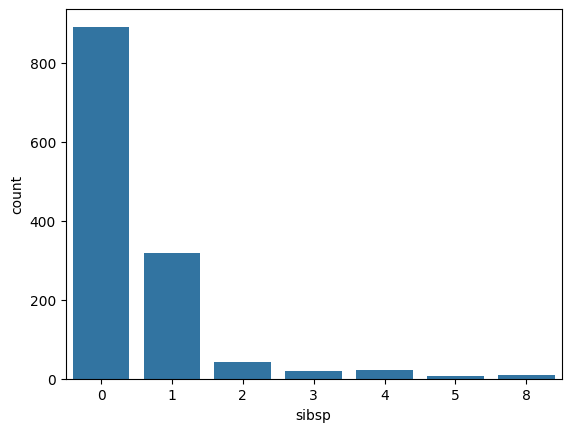

In [11]:
sns.countplot(x='sibsp', data=titanic_data)

<Axes: xlabel='survived', ylabel='count'>

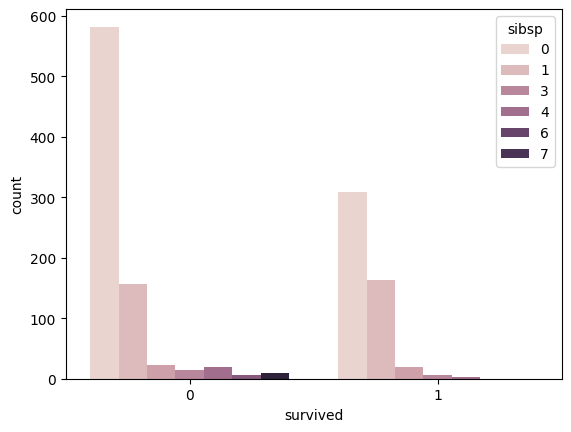

In [12]:
sns.countplot(x='survived', hue='sibsp', data=titanic_data)

## Data Wrangling

In [13]:
titanic_data.isnull()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,False,False,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,False,True,True,False
3,False,False,False,False,False,False,False,False,False,False,False,True,False,False
4,False,False,False,False,False,False,False,False,False,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,False,False,False,False,False,False,False,False,False,True,False,True,False,True
1305,False,False,False,False,True,False,False,False,False,True,False,True,True,True
1306,False,False,False,False,False,False,False,False,False,True,False,True,False,True
1307,False,False,False,False,False,False,False,False,False,True,False,True,True,True


In [14]:
titanic_data.isnull().sum()

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

<Axes: >

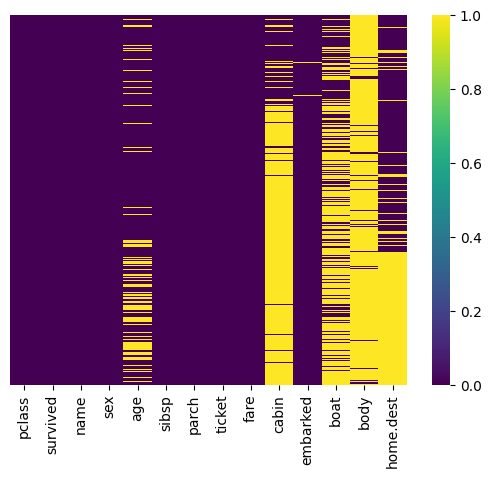

In [15]:
sns.heatmap(titanic_data.isnull(), yticklabels=False, cmap="viridis")

<Axes: xlabel='pclass', ylabel='age'>

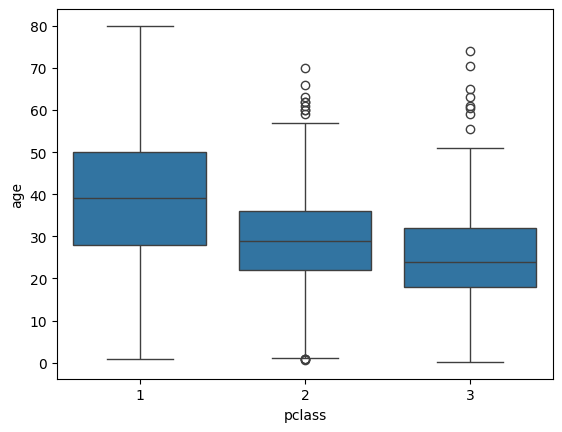

In [16]:
sns.boxplot(x="pclass", y="age", data=titanic_data)

In [17]:
titanic_data.drop("body", axis=1, inplace=True)

In [18]:
titanic_data.drop("cabin", axis=1, inplace=True)

In [19]:
titanic_data.head(5)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked,boat,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,S,2,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,S,11,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,S,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,S,NaN,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,S,NaN,"Montreal, PQ / Chesterville, ON"


In [20]:
titanic_data.drop("boat", axis=1, inplace=True)

In [21]:
titanic_data.dropna(inplace=True)

<Axes: >

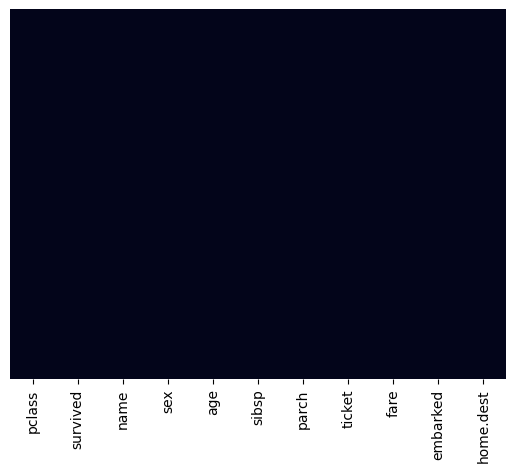

In [22]:
sns.heatmap(titanic_data.isnull(), yticklabels=False, cbar=False)

In [23]:
titanic_data.isnull().sum()

pclass       0
survived     0
name         0
sex          0
age          0
sibsp        0
parch        0
ticket       0
fare         0
embarked     0
home.dest    0
dtype: int64

In [24]:
sex = pd.get_dummies(titanic_data['sex'], dtype=int, drop_first=True)
sex.head(5)

,male
0,0
1,1
2,0
3,1
4,0


In [25]:
embark = pd.get_dummies(titanic_data['embarked'], dtype=int, drop_first=True)
embark.head(5)

,Q,S
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [26]:
pcl = pd.get_dummies(titanic_data['pclass'], dtype=int, drop_first=True)
pcl.head(5)

,2,3
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


In [27]:
titanic_data.head(3)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,S,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,S,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,S,"Montreal, PQ / Chesterville, ON"


In [28]:
titanic_data = pd.concat([titanic_data, sex, embark, pcl], axis=1)

In [29]:
titanic_data.head(5)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked,home.dest,male,Q,S,2,3
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,S,"St Louis, MO",0,0,1,0,0
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,S,"Montreal, PQ / Chesterville, ON",1,0,1,0,0
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,S,"Montreal, PQ / Chesterville, ON",0,0,1,0,0
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,S,"Montreal, PQ / Chesterville, ON",1,0,1,0,0
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,S,"Montreal, PQ / Chesterville, ON",0,0,1,0,0


In [30]:
titanic_data.drop(['name', 'sex', 'embarked', 'ticket', 'home.dest'], axis=1, inplace=True)

In [31]:
titanic_data.head(5)

,pclass,survived,age,sibsp,parch,fare,male,Q,S,2,3
0,1,1,29.0000,0,0,211.3375,0,0,1,0,0
1,1,1,0.9167,1,2,151.5500,1,0,1,0,0
2,1,0,2.0000,1,2,151.5500,0,0,1,0,0
3,1,0,30.0000,1,2,151.5500,1,0,1,0,0
4,1,0,25.0000,1,2,151.5500,0,0,1,0,0


In [32]:
titanic_data.drop(['pclass'], axis=1, inplace=True)

In [33]:
titanic_data.head(5)

,survived,age,sibsp,parch,fare,male,Q,S,2,3
0,1,29.0000,0,0,211.3375,0,0,1,0,0
1,1,0.9167,1,2,151.5500,1,0,1,0,0
2,0,2.0000,1,2,151.5500,0,0,1,0,0
3,0,30.0000,1,2,151.5500,1,0,1,0,0
4,0,25.0000,1,2,151.5500,0,0,1,0,0


### Train data

In [34]:
X = titanic_data.drop("survived", axis=1)
X = X.rename(str,axis="columns") 
y = titanic_data['survived']

In [35]:
titanic_data.head(2)

,survived,age,sibsp,parch,fare,male,Q,S,2,3
0,1,29.0000,0,0,211.3375,0,0,1,0,0
1,1,0.9167,1,2,151.5500,1,0,1,0,0


In [36]:
X.head(2)

,age,sibsp,parch,fare,male,Q,S,2,3
0,29.0000,0,0,211.3375,0,0,1,0,0
1,0.9167,1,2,151.5500,1,0,1,0,0


In [37]:
from sklearn.model_selection import train_test_split

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [39]:
from sklearn.linear_model import LogisticRegression

In [40]:
logmodel = LogisticRegression(solver='lbfgs', max_iter=1000)

In [41]:
logmodel.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [42]:
X.head(2)

,age,sibsp,parch,fare,male,Q,S,2,3
0,29.0000,0,0,211.3375,0,0,1,0,0
1,0.9167,1,2,151.5500,1,0,1,0,0


In [43]:
predictions =logmodel.predict(X_test)

In [44]:
from sklearn.metrics import classification_report

In [45]:
classification_report(y_test, predictions)

'              precision    recall  f1-score   support\n\n           0       0.75      0.86      0.80       106\n           1       0.82      0.69      0.75       100\n\n    accuracy                           0.78       206\n   macro avg       0.78      0.77      0.77       206\nweighted avg       0.78      0.78      0.77       206\n'

In [46]:
from sklearn.metrics import confusion_matrix

In [47]:
confusion_matrix(y_test, predictions)

array([[91, 15],
       [31, 69]], dtype=int64)

In [48]:
from sklearn.metrics import accuracy_score

In [49]:
accuracy_score(y_test, predictions)

0.7766990291262136